# A Notebook showcasing the NTS-UK 2017 travel patterns and Simulated EV demand across years and seasons.

### Importing Libraries & Root folder

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import EVforecaster.config as cfg
import numpy as np

dataframes_folder = cfg.root_folder + "/dataframes/"
plots_folder = cfg.root_folder + "/plots/"


### Importing Data

In [2]:
nts_uk_2017 = pd.read_pickle(dataframes_folder + f"/Ready_to_model_df_[2017].pkl")



In [3]:
nts_uk_2017.head()

,DayID,TripID,IndividualID,HouseholdID,TravDay,JourSeq,TripStart,TripEnd,TripDisExSW,TripStartLoc,...,TripEndRolling,TravelYear,TravelWeekDay_B01ID,TWSWeek,TripStartRolling+1,TimeEndLoc,Distance+1,WeekDayDiff,WeekRollover,TWSWeekNew
0,2.016099e+09,2.016209e+09,2.016016e+09,2.016006e+09,3.0,2.0,655.0,665.0,4.0,3,...,3545.0,2017,7,53,3585.0,40.0,4.0,NaN,0,53
1,2.016099e+09,2.016209e+09,2.016016e+09,2.016006e+09,3.0,3.0,705.0,715.0,4.0,2,...,3595.0,2017,7,53,5040.0,1445.0,15.0,0.0,0,53
2,2.016099e+09,2.016209e+09,2.016016e+09,2.016006e+09,4.0,1.0,720.0,740.0,15.0,3,...,5060.0,2017,1,53,5130.0,70.0,15.0,-6.0,1,54
3,2.016099e+09,2.016209e+09,2.016016e+09,2.016006e+09,4.0,2.0,810.0,830.0,15.0,2,...,5150.0,2017,1,53,6310.0,1160.0,1.0,0.0,1,54
4,2.016099e+09,2.016209e+09,2.016016e+09,2.016006e+09,5.0,1.0,550.0,555.0,1.0,3,...,6315.0,2017,2,53,6480.0,165.0,1.0,1.0,1,54


## NTS-UK 2017 travel patterns

## Exploring travel patterns over the year

### Average overall trip distance

In [4]:
nts_uk_2017.columns

Index(['DayID', 'TripID', 'IndividualID', 'HouseholdID', 'TravDay', 'JourSeq',
       'TripStart', 'TripEnd', 'TripDisExSW', 'TripStartLoc', 'TripEndLoc',
       'TripType', 'TripStartRolling', 'TripEndRolling', 'TravelYear',
       'TravelWeekDay_B01ID', 'TWSWeek', 'TripStartRolling+1', 'TimeEndLoc',
       'Distance+1', 'WeekDayDiff', 'WeekRollover', 'TWSWeekNew'],
      dtype='object')

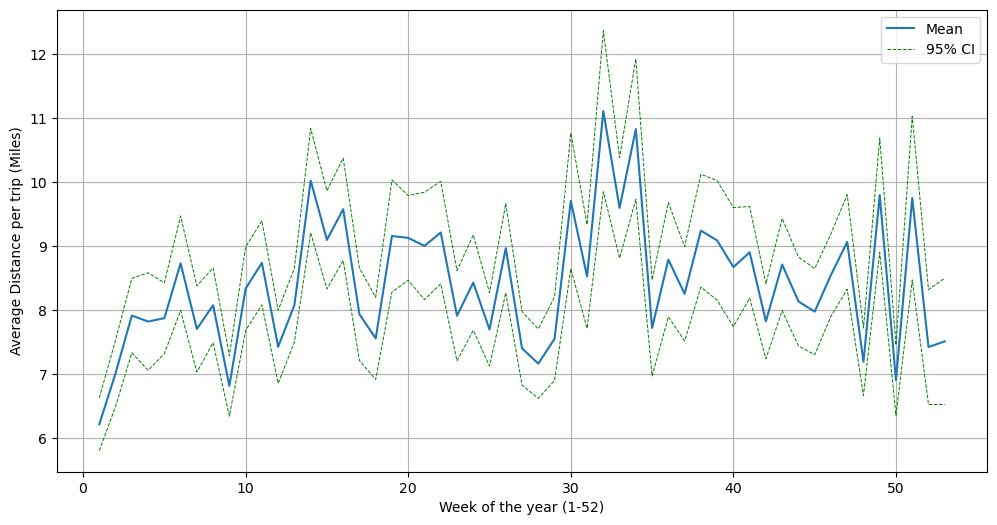

In [5]:
distance_by_week = nts_uk_2017.groupby("TWSWeek")["TripDisExSW"].agg(["mean", "std", "count"])

distance_by_week["CI"] = 1.96*distance_by_week["std"]/ np.sqrt(distance_by_week["count"])

distance_by_week["CI-"] = distance_by_week["mean"] - distance_by_week["CI"]
distance_by_week["CI+"] = distance_by_week["mean"] + distance_by_week["CI"]

x = distance_by_week.index
y = distance_by_week["mean"]
ci_plus = distance_by_week["CI+"]
ci_minus = distance_by_week["CI-"]

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x,y, label="Mean")
plt.plot(x, ci_plus, label="95% CI" , linestyle="--", color="green", linewidth=0.7)
plt.plot(x, ci_minus, linestyle="--",                 color="green", linewidth=0.7)

plt.legend()

plt.ylabel("Average Distance per trip (Miles)")
plt.xlabel("Week of the year (1-52)")

plt.savefig(plots_folder + "/weekly_trip_distance.pdf", format="pdf")


### Average Total Distance Travelled by Individual

In [6]:
nts_uk_2017.columns

Index(['DayID', 'TripID', 'IndividualID', 'HouseholdID', 'TravDay', 'JourSeq',
       'TripStart', 'TripEnd', 'TripDisExSW', 'TripStartLoc', 'TripEndLoc',
       'TripType', 'TripStartRolling', 'TripEndRolling', 'TravelYear',
       'TravelWeekDay_B01ID', 'TWSWeek', 'TripStartRolling+1', 'TimeEndLoc',
       'Distance+1', 'WeekDayDiff', 'WeekRollover', 'TWSWeekNew'],
      dtype='object')

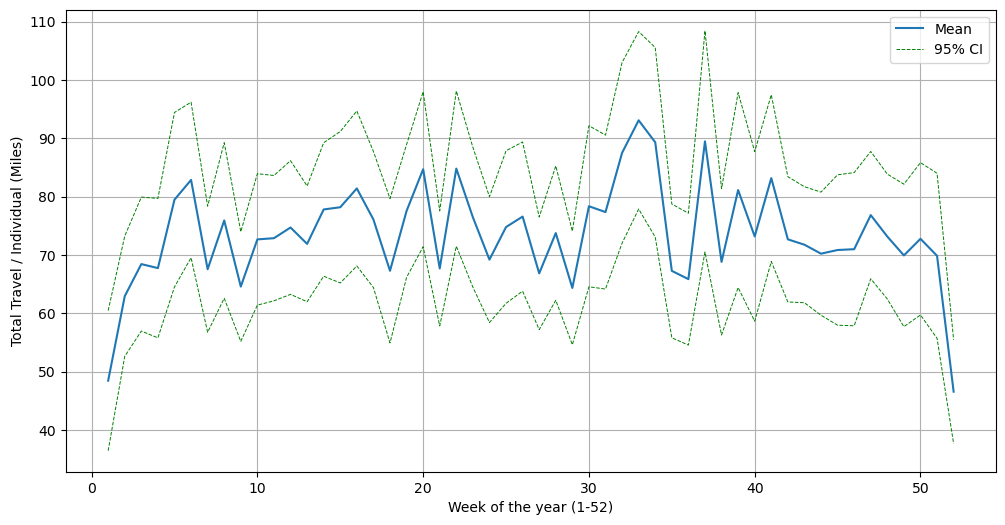

In [7]:
nts_uk_2017 = nts_uk_2017[~nts_uk_2017["TWSWeekNew"].isin([53,54])]


weekly_individual_distance = nts_uk_2017.groupby(["TWSWeekNew", "IndividualID"])["TripDisExSW"].sum()

weekly_average_distance = weekly_individual_distance.groupby("TWSWeekNew").agg(["mean", "std", "count"])

weekly_average_distance["CI"] = 1.96*weekly_average_distance["std"]/ np.sqrt(weekly_average_distance["count"])

weekly_average_distance["CI-"] = weekly_average_distance["mean"] - weekly_average_distance["CI"]
weekly_average_distance["CI+"] = weekly_average_distance["mean"] + weekly_average_distance["CI"]

x = weekly_average_distance.index
y = weekly_average_distance["mean"]
ci_plus = weekly_average_distance["CI+"]
ci_minus = weekly_average_distance["CI-"]

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x,y, label="Mean")
plt.plot(x, ci_plus, label="95% CI" , linestyle="--", color="green", linewidth=0.7)
plt.plot(x, ci_minus, linestyle="--",                 color="green", linewidth=0.7)

plt.legend()

plt.ylabel("Total Travel / Individual (Miles)")
plt.xlabel("Week of the year (1-52)")

plt.savefig(plots_folder + "/Total_trav_per_individual.pdf", format="pdf")

### Small exploration of 2017 Electric ChargePoint Analysis

In [12]:
data_folder  = cfg.root_folder + "/data"

ECA_df = pd.read_csv(data_folder+"/electric-chargepoint-analysis-2017-raw-domestics-data.csv")

In [15]:
len(ECA_df["CPID"].unique())

21324

In [46]:
weekly_average_distance

,mean,std,count,CI,CI-,CI+
TWSWeekNew,,,,,,
1,48.453082,74.076656,146,12.016030,36.437052,60.469112
2,62.935306,82.340366,245,10.310645,52.624661,73.245951
3,68.437984,91.345082,243,11.485188,56.952796,79.923171
4,67.747843,97.426910,255,11.958175,55.789668,79.706018
5,79.480133,114.438886,225,14.953348,64.526786,94.433481
6,82.870044,102.490066,227,13.332909,69.537135,96.202953
7,67.555404,77.585889,198,10.807027,56.748378,78.362431
8,75.920091,100.937303,220,13.338176,62.581915,89.258266
9,64.582155,73.074114,232,9.403199,55.178956,73.985354


### Exploring TripType Proportions

In [13]:
triptype_vcs = nts_uk_2017.value_counts("TripType",normalize=True)

triptype_vcs.to_frame().round(3).sort_index()

,proportion
TripType,
1,0.104
2,0.098
3,0.322
4,0.321
5,0.025
6,0.020
8,0.109


### Trip Type Mapping

In [14]:
trip_type_mapping = {
    
    1:   "Home-Work",
    2:   "Work-Home",

    3:   "Home-Other",
    4:   "Other-Home",

    5:   "Work-Other",
    6:   "Other-Work",

    7:   "Home-Home",
    8:   "Other-Other",
    #"3-3": 9,   #Work-Work
}

### Plotting Distributions of TripStart and TripDisExSW across different trip types.

In [15]:
def plot_dists(df, trip_type_index, variable_index, mapping=trip_type_mapping):
    ## Comparing individual trip stats

    df = df.copy()
    df = df[df.TripType == trip_type_index]

    # Plot histogram
    #plt.figure(figsize=(7, 5))
    plt.hist(df[variable_index], bins=75, alpha=0.5, label="Real", color="blue", density=True)


    if variable_index == "TripDisExSW":
        plt.xlim(0,100)

    # Labels and legend
    plt.xlabel(f"{variable_index}")
    plt.ylabel("Density")
    plt.title(f"Histogram of {variable_index} for trip type: {mapping[trip_type_index]}.")
    plt.grid()

/home/trapfishscott/miniconda3/envs/EnergyThesis/lib/python3.13/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


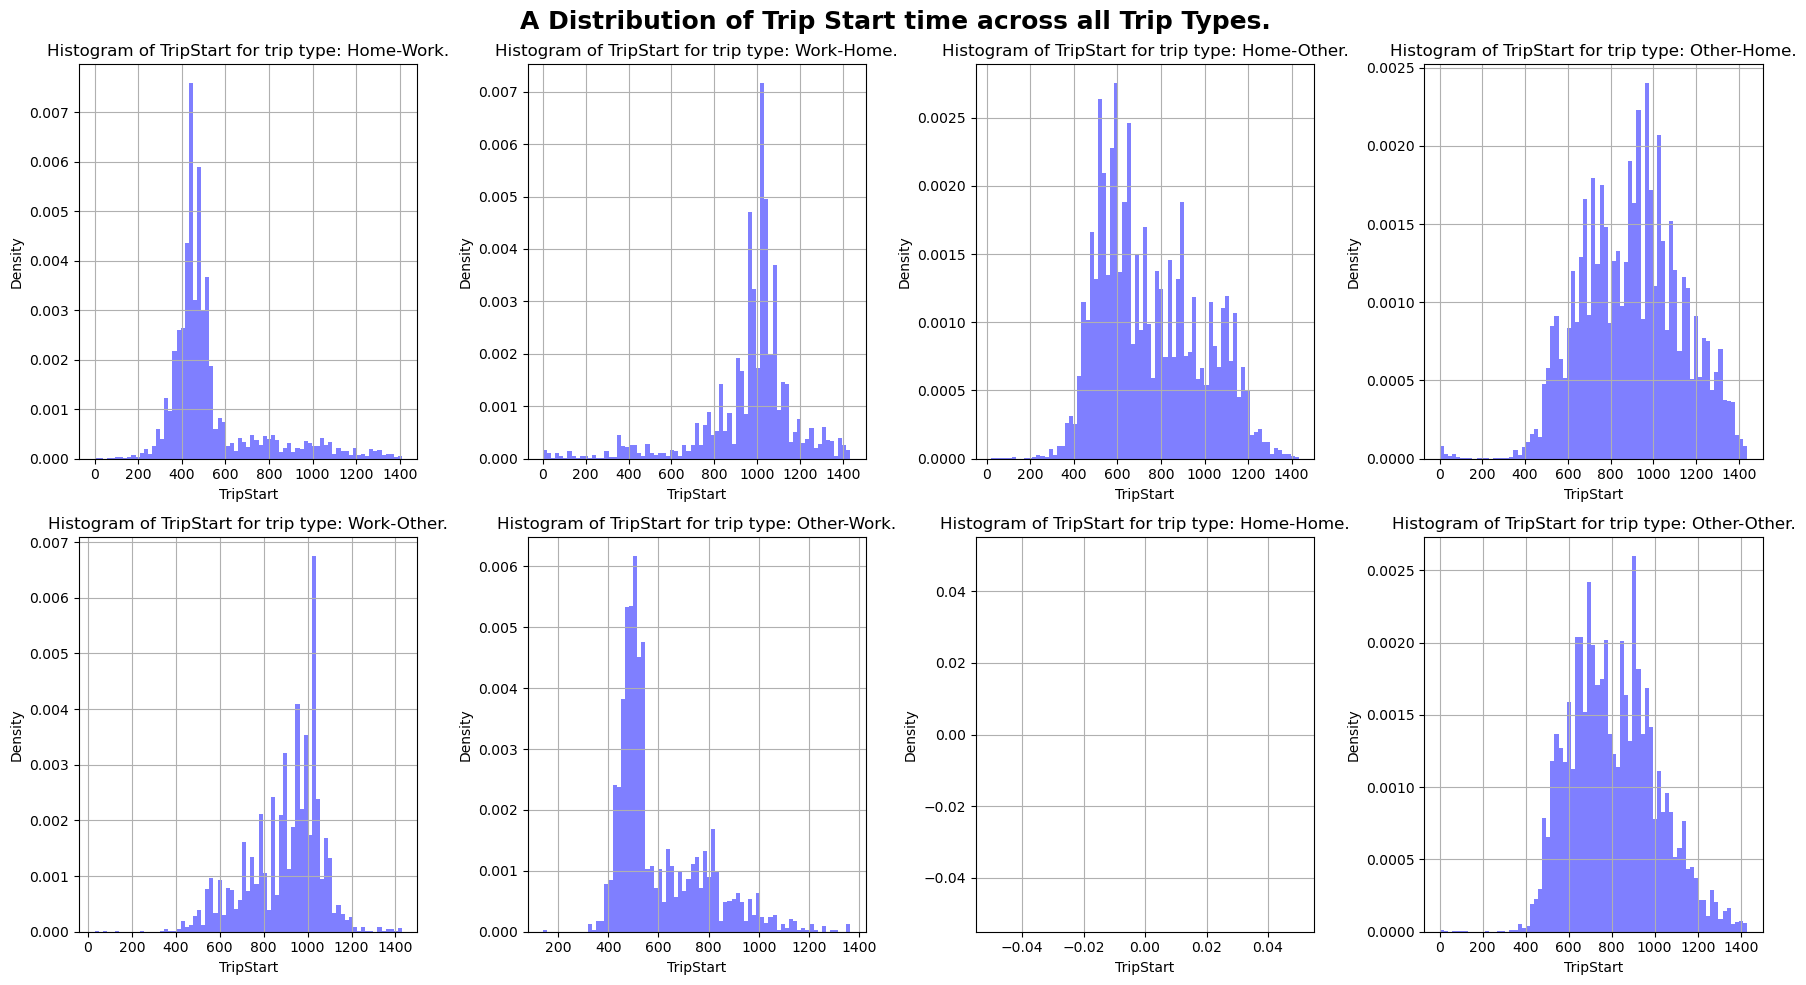

In [16]:
plt.figure(figsize=(18, 10))
# 🔹 Add an overall title
plt.suptitle("A Distribution of Trip Start time across all Trip Types.", fontsize=18, fontweight="bold")

for i in range(1,9):
    plt.subplot(2,4,i)
    plot_dists(df=nts_uk_2017, trip_type_index=i, variable_index="TripStart")


plt.tight_layout()  # Adjust layout to avoid overlap

plt.savefig(plots_folder + "/TripStartTripType.pdf", format="pdf", bbox_inches="tight")

plt.show()



/home/trapfishscott/miniconda3/envs/EnergyThesis/lib/python3.13/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


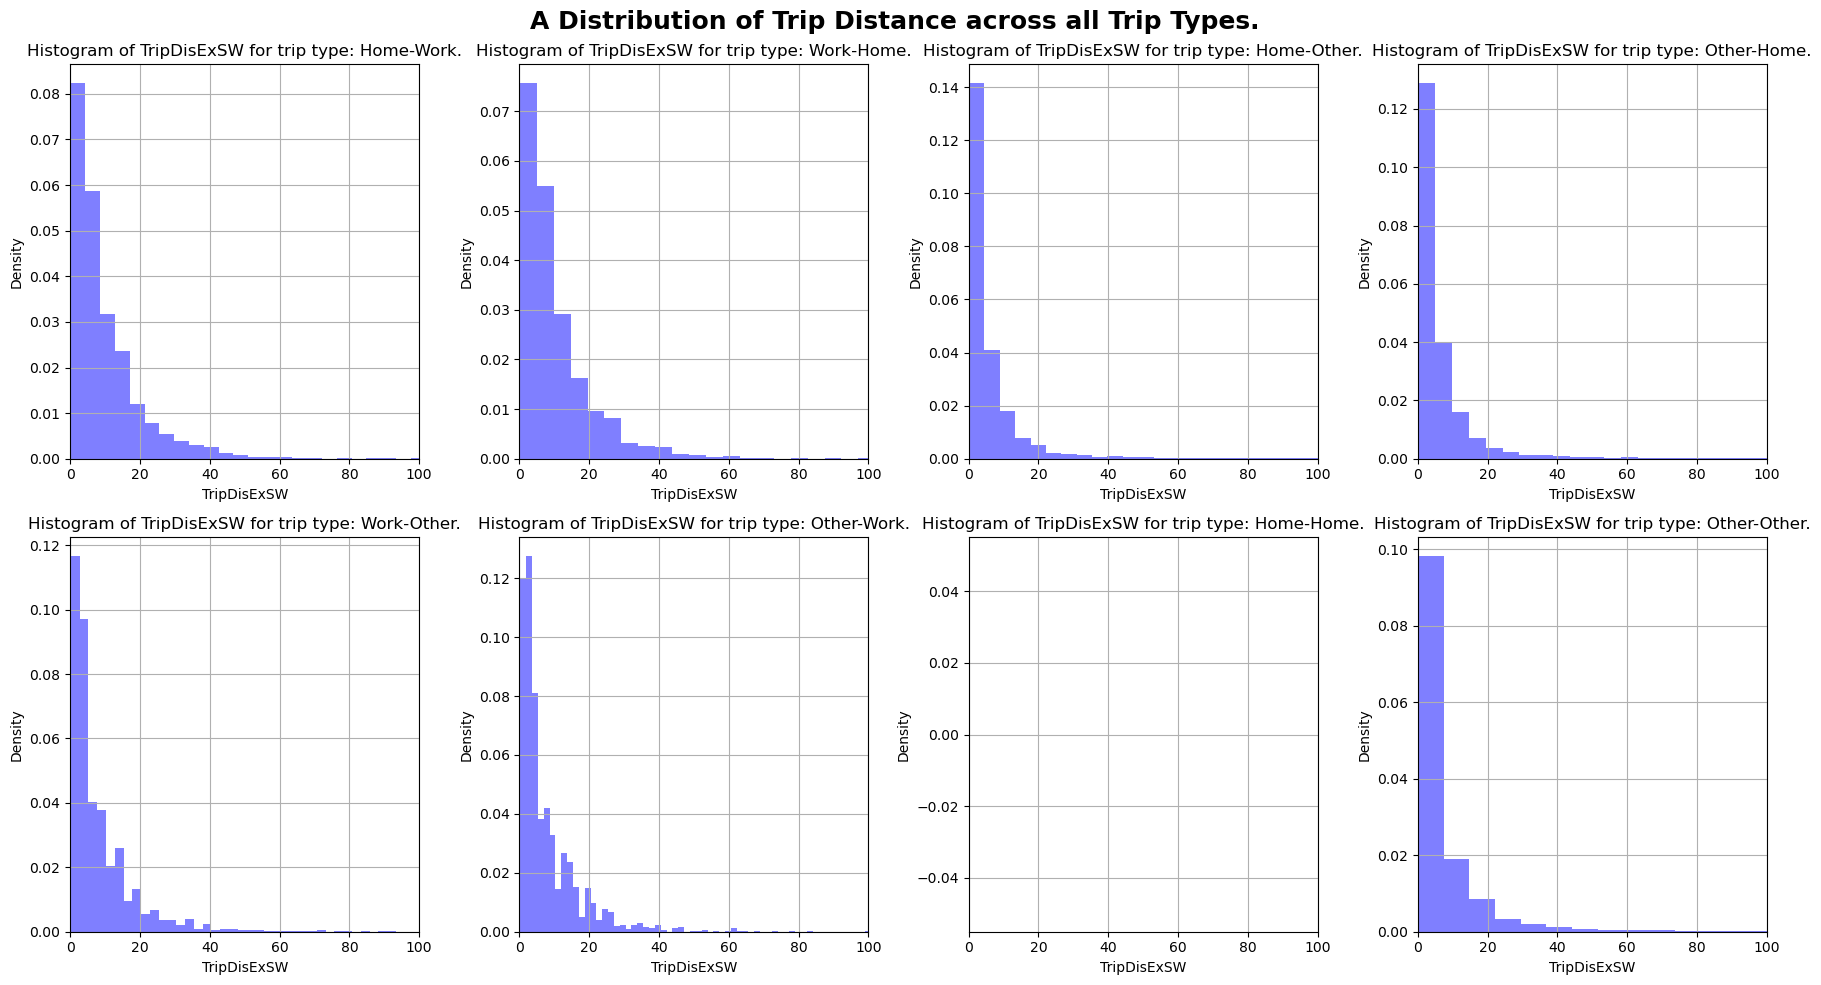

In [17]:
plt.figure(figsize=(18, 10))
# 🔹 Add an overall title
plt.suptitle("A Distribution of Trip Distance across all Trip Types.", fontsize=18, fontweight="bold")

for i in range(1,9):
    plt.subplot(2,4,i)
    plot_dists(df=nts_uk_2017, trip_type_index=i, variable_index="TripDisExSW")


plt.tight_layout()  # Adjust layout to avoid overlap

plt.savefig(plots_folder + "/DistanceTripType.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Parking Heatplot

In [18]:
nts_uk_2017.columns

Index(['DayID', 'TripID', 'IndividualID', 'HouseholdID', 'TravDay', 'JourSeq',
       'TripStart', 'TripEnd', 'TripDisExSW', 'TripStartLoc', 'TripEndLoc',
       'TripType', 'TripStartRolling', 'TripEndRolling', 'TravelYear',
       'TravelWeekDay_B01ID', 'TWSWeek', 'TripStartRolling+1', 'TimeEndLoc',
       'Distance+1', 'WeekDayDiff', 'WeekRollover', 'TWSWeekNew'],
      dtype='object')

In [19]:
parking_df = nts_uk_2017[["TripEndRolling", "TripStartRolling+1", "TripEndLoc", "TimeEndLoc", "TravelWeekDay_B01ID"]].copy()

parking_df["5MinBinStart"] = (parking_df["TripEndRolling"] %1440 ) // 5
parking_df["5MinBinEnd"] = (parking_df["TripStartRolling+1"] %1440 ) // 5


parking_df = parking_df.reset_index(drop=True)


In [20]:
time_labels = [f"{h:02d}:{m:02d}" for h in range(24) for m in range(0, 60, 5)]

def plot_parking(location, parking_df, time_labels=time_labels, dow = list(range(1,8))):

    location_mapping = {1: "Work",
                        2: "Other",
                        3: "Home"}
    
    parking_df = parking_df.copy()

    parking_df = parking_df[parking_df["TravelWeekDay_B01ID"].isin(dow)]

    parking_df = parking_df[parking_df["TripEndLoc"] == location]


    parking_df = parking_df.reset_index(drop=True)

    array = np.zeros((len(parking_df), 288))

    parking_df

    for idx, row in parking_df.iterrows():
        if pd.notna(row["5MinBinEnd"]):

            start = int(row["5MinBinStart"])
            end = int(row["5MinBinEnd"])

            if start < end:

                array[idx,  start : end    ] = 1

            else:

                array[idx,  start : 288    ] = 1
                array[idx, 0: end ] = 1

    y = array.sum(axis=0)


    plt.plot(time_labels, y, label = location_mapping[location])
    plt.fill_between(time_labels, y, alpha=0.3)


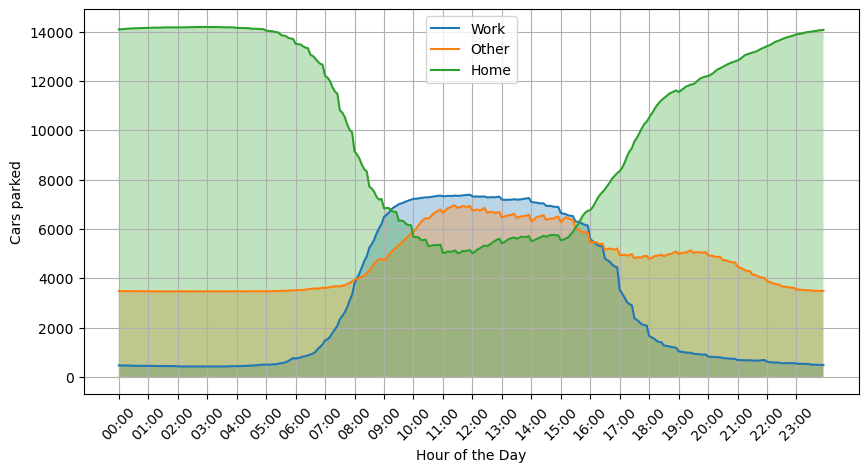

In [21]:
weekdays = list(range(1,5))
weekends = [6,7]

plt.figure(figsize=(10,5))

for i in range(1,4):
    plot_parking(i, parking_df, dow=weekdays)

plt.xticks(ticks=range(0, 288, 12), labels=time_labels[::12], rotation=45)
plt.grid()

plt.xlabel("Hour of the Day")
plt.ylabel("Cars parked")

plt.legend()

plt.savefig(plots_folder + "/Parking.pdf", format="pdf", bbox_inches="tight")

plt.show()